# Perform Supervised Machine Learning: Regression

UNICEF_Global_Databases_Mortality

In [1]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Sourcing and Data Wrangling

In [2]:

path = r'C:\Users\mutta\Documents\Project 6'
path

#the vars_list shortcut, omitting the “eval_set” column in your final dataframe.
vars_list = ['REF_AREA:Geographic area', 'INDICATOR:Indicator', 'SEX:Sex', 'TIME_PERIOD:Time period', 'OBS_VALUE:Observation Value']

join = os.path.join(path, '02 Data', 'Prepared Data', '01 CSV','UNICEF_Global_Databases_Mortality.csv')

pd.options.display.float_format = '{:.2f}'.format

df = pd.read_csv(join, index_col = False, encoding= 'unicode_escape', usecols = vars_list)

df.round(2)

C:\Users\mutta\AppData\Local\Temp\ipykernel_13668\3536880413.py:11: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(join, index_col = False, encoding= 'unicode_escape', usecols = vars_list)


,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value
0,AFG: Afghanistan,CME_ARR_10T19: Annual Rate of Reduction in Mor...,_T: Total,2021,-0.4
1,AFG: Afghanistan,CME_ARR_SBR: Annual rate of reduction in still...,_T: Total,2021,1.52530688963666
2,AFG: Afghanistan,CME_ARR_U5MR: Annual rate of reduction in unde...,_T: Total,2020,4
3,AFG: Afghanistan,CME_MRM0: Neonatal mortality rate,_T: Total,1987,78.9641805074777
4,AFG: Afghanistan,CME_MRM0: Neonatal mortality rate,_T: Total,1988,77.4089330495731
...,...,...,...,...,...
1967349,UNSDG_SUBSAHARANAFRICA: sub-Saharan Africa,WS_SCH_W-N: Proportion of schools with no drin...,_T: Total,2017,44.48
1967350,UNSDG_SUBSAHARANAFRICA: sub-Saharan Africa,WS_SCH_W-N: Proportion of schools with no drin...,_T: Total,2018,43.52
1967351,UNSDG_SUBSAHARANAFRICA: sub-Saharan Africa,WS_SCH_W-N: Proportion of schools with no drin...,_T: Total,2019,42.70
1967352,UNSDG_SUBSAHARANAFRICA: sub-Saharan Africa,WS_SCH_W-N: Proportion of schools with no drin...,_T: Total,2020,41.73


In [3]:
df.round(2)
df = df.applymap(str)

In [4]:
df.columns

Index(['REF_AREA:Geographic area', 'INDICATOR:Indicator', 'SEX:Sex',
       'TIME_PERIOD:Time period', 'OBS_VALUE:Observation Value'],
      dtype='object')

In [5]:
df.describe()

,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value
count,1967354,1967354,1967354,1967354,1967354
unique,304,403,3,184,1003280
top,PER: Peru,DM_LIFE_EXP: Life expectancy,_T: Total,2019,0
freq,12940,56388,965843,59024,34802


In [6]:

derived_df = df

derived_df[['INDICATOR:Indicator','indicators']] = df['INDICATOR:Indicator'].str.split(':',expand=True, n=1)




In [7]:
derived_df.head(10)

,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,indicators
0,AFG: Afghanistan,CME_ARR_10T19,_T: Total,2021,-0.4,Annual Rate of Reduction in Mortality Rate Ag...
1,AFG: Afghanistan,CME_ARR_SBR,_T: Total,2021,1.52530688963666,Annual rate of reduction in stillbirth rate (...
2,AFG: Afghanistan,CME_ARR_U5MR,_T: Total,2020,4,Annual rate of reduction in under-five mortal...
3,AFG: Afghanistan,CME_MRM0,_T: Total,1987,78.9641805074777,Neonatal mortality rate
4,AFG: Afghanistan,CME_MRM0,_T: Total,1988,77.4089330495731,Neonatal mortality rate
5,AFG: Afghanistan,CME_MRM0,_T: Total,1989,75.8734399194055,Neonatal mortality rate
6,AFG: Afghanistan,CME_MRM0,_T: Total,1990,74.4460210090989,Neonatal mortality rate
7,AFG: Afghanistan,CME_MRM0,_T: Total,1991,72.8968867479946,Neonatal mortality rate
8,AFG: Afghanistan,CME_MRM0,_T: Total,1992,71.3359663191345,Neonatal mortality rate
9,AFG: Afghanistan,CME_MRM0,_T: Total,1993,69.8007544096968,Neonatal mortality rate


In [8]:
# Select the indicator names for correlation analysis
selected_indicator = [' Height-for-age <-2 SD (stunting)']

# Filter the DataFrame based on the selected indicators
filtered_df = derived_df[derived_df['indicators'].isin(selected_indicator)]


In [9]:
filtered_df.describe()

,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,indicators
count,2771,2771,2771,2771,2771,2771
unique,159,1,3,113,608,1
top,NER: Niger,NT_ANT_HAZ_NE2,_T: Total,2000,32.4,Height-for-age <-2 SD (stunting)
freq,67,2771,1051,156,15,2771


In [10]:
#result = derived_df[derived_df['indicators'].str.contains('Wasting',  regex=False)]
#result['indicators'].unique()

In [11]:
filtered_df['TIME_PERIOD:Time period'].unique()

array(['2004', '2013', '2018', '1997', '2005', '2009', '2017', '1992',
       '1995', '2000', '2002', '2006', '2012', '2019', '1987', '1996',
       '2007', '2015', '1994', '1998', '2010', '2016', '2011', '2001',
       '1989', '2005-07-02', '2011-09-30', '2013-02-16', '2013-06-16',
       '2014', '2019-03-27', '1986', '1990', '1991', '1993', '1999',
       '2003', '2005-12-31', '2011-12-31', '2019-01-24', '2008',
       '2010-09-07', '2010-09-10', '2020', '2021-09-30', '2021-10-10',
       '2022', '1985', '2021', '2019-03-14', '2019-11-07', '2019-08-12',
       '2019-08-27', '1988', '2010-06-12', '2010-08-01', '2018-03-13',
       '2018-04-09', '2015-02-14', '2015-12-31', '2012-01-06',
       '2012-08-06', '2019-01-15', '2019-09-15', '2012-03-22',
       '2012-04-01', '2016-01-15', '2016-05-11', '2016-12-01',
       '2020-04-16', '2020-12-11', '2015-05-22', '2015-09-05',
       '2018-07-24', '2018-09-27', '2006-01-01', '2006-01-30',
       '2010-08-22', '2010-10-24', '2016-05-15', '20

In [12]:

print(filtered_df.dtypes)



REF_AREA:Geographic area       object
INDICATOR:Indicator            object
SEX:Sex                        object
TIME_PERIOD:Time period        object
OBS_VALUE:Observation Value    object
indicators                     object
dtype: object


In [13]:
filtered_df = filtered_df.copy()
filtered_df['Year'] = filtered_df['TIME_PERIOD:Time period'].str.slice(start=0, stop=4)

filtered_df = filtered_df.copy()
filtered_df['OBS_VALUE:Observation Value'] = filtered_df['OBS_VALUE:Observation Value'].astype(float)

# Extract country name
filtered_df['REF_AREA:Geographic area'] = filtered_df['REF_AREA:Geographic area'].str.split(': ').str[-1]

filtered_df = filtered_df.copy()
filtered_df['Year'] = filtered_df['Year'].astype('int')

print('-------------------------------------------------')

print(filtered_df['Year'].unique())


-------------------------------------------------
[2004 2013 2018 1997 2005 2009 2017 1992 1995 2000 2002 2006 2012 2019
 1987 1996 2007 2015 1994 1998 2010 2016 2011 2001 1989 2014 1986 1990
 1991 1993 1999 2003 2008 2020 2021 2022 1985 1988 1983]


In [14]:
filtered_df.head(10)

,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,indicators,Year
7136,Afghanistan,NT_ANT_HAZ_NE2,F: Female,2004,58.50,Height-for-age <-2 SD (stunting),2004
7137,Afghanistan,NT_ANT_HAZ_NE2,F: Female,2013,39.50,Height-for-age <-2 SD (stunting),2013
7138,Afghanistan,NT_ANT_HAZ_NE2,F: Female,2018,38.10,Height-for-age <-2 SD (stunting),2018
7139,Afghanistan,NT_ANT_HAZ_NE2,M: Male,2004,60.00,Height-for-age <-2 SD (stunting),2004
7140,Afghanistan,NT_ANT_HAZ_NE2,M: Male,2013,41.30,Height-for-age <-2 SD (stunting),2013
7141,Afghanistan,NT_ANT_HAZ_NE2,M: Male,2018,38.30,Height-for-age <-2 SD (stunting),2018
7142,Afghanistan,NT_ANT_HAZ_NE2,_T: Total,1997,53.20,Height-for-age <-2 SD (stunting),1997
7143,Afghanistan,NT_ANT_HAZ_NE2,_T: Total,2004,59.30,Height-for-age <-2 SD (stunting),2004
7144,Afghanistan,NT_ANT_HAZ_NE2,_T: Total,2013,40.40,Height-for-age <-2 SD (stunting),2013
7145,Afghanistan,NT_ANT_HAZ_NE2,_T: Total,2018,38.20,Height-for-age <-2 SD (stunting),2018


Data collection: Gather a dataset that includes information on stunting prevalence and mortality rates due to stunting in children under 5 years old. Ensure the data covers multiple regions or countries and spans several years.

Data preprocessing: Clean and prepare the dataset for analysis. This may involve handling missing values, checking for outliers, and formatting the data in a suitable manner.

Exploratory data analysis: Conduct exploratory data analysis to understand the distribution, summary statistics, and any patterns or relationships between the variables.

Regression model selection: Based on the nature of your data and research question, choose an appropriate regression model. For example, you could use multiple linear regression if you have multiple predictor variables.

Model training and evaluation: Split the dataset into training and testing sets. Train the regression model on the training set and evaluate its performance using appropriate metrics. Adjust the model if necessary.

Interpretation of results: Analyze the regression coefficients to understand the relationship between stunting prevalence and mortality rates. Assess the significance of the predictors and draw conclusions based on the results.

Note that without access to mortality rate data, it is not possible to perform a regression analysis specifically on mortality due to stunting in children under 5.



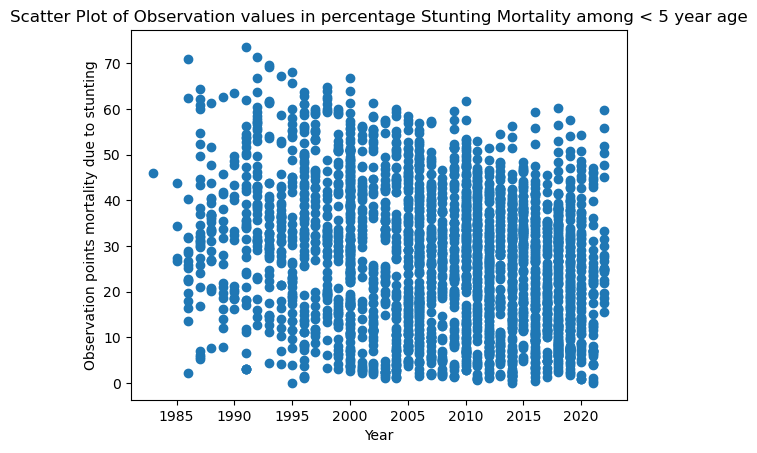

In [15]:

years = filtered_df['Year']
avg_obs_values = filtered_df['OBS_VALUE:Observation Value']

# Create the scatter plot
plt.scatter(years, avg_obs_values)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Observation points mortality due to stunting')
plt.title('Scatter Plot of Observation values in percentage Stunting Mortality among < 5 year age')

# Show the plot
plt.show()

In [16]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [18]:
#11.
#Export your df_ords dataframe as “orders_wrangled.csv” in your “Prepared Data” folder.

filtered_df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'mortality_stunting.csv'), index=False)

### Note:  Filtered the above csv file and Stunting data to compact form for analysis using excel
### New generated files are Stunting_OBS_compact.csv and Mortality_Stunting_OBS_compact.csv 
### For reference calculation available in Consolidate folder in Perpared data

In [28]:


join = os.path.join(path, '02 Data', 'Prepared Data', '01 CSV','Stunting_OBS_compact.csv')

pd.options.display.float_format = '{:.2f}'.format

df_Stunting = pd.read_csv(join, index_col = False, encoding= 'unicode_escape')

df_Stunting.round(2)

,Country,Year,National Point Estimate
0,Afghanistan,1997,53.20
1,Afghanistan,2004,59.30
2,Afghanistan,2013,40.40
3,Afghanistan,2018,38.20
4,Albania,2005,26.70
...,...,...,...
1008,Zimbabwe,2009,35.10
1009,Zimbabwe,2010,32.20
1010,Zimbabwe,2014,27.60
1011,Zimbabwe,2015,27.10


In [35]:
df_Stunting.describe()

,Year,National Point Estimate
count,1013.00,1013.00
mean,2005.93,27.54
std,9.49,15.87
min,1983.00,0.00
25%,1999.00,14.60
50%,2007.00,27.50
75%,2014.00,38.70
max,2022.00,73.60


In [30]:


join = os.path.join(path, '02 Data', 'Prepared Data', '01 CSV','Mortality_Stunting_OBS_compact.csv')

pd.options.display.float_format = '{:.2f}'.format

df_mortality = pd.read_csv(join, index_col = False, encoding= 'unicode_escape')

df_mortality.round(2)

,Country,Year,OBS Value_mortality
0,Afghanistan,1997,53.20
1,Afghanistan,2004,177.80
2,Afghanistan,2013,121.20
3,Afghanistan,2018,114.60
4,Albania,2005,79.60
...,...,...,...
1008,Zimbabwe,2009,105.30
1009,Zimbabwe,2010,96.70
1010,Zimbabwe,2014,82.80
1011,Zimbabwe,2015,81.30


In [37]:
df_mortality.describe(include='all')

,Country,Year,OBS Value_mortality
count,1013,1013.00,1013.00
unique,159,NaN,NaN
top,Bangladesh,NaN,NaN
freq,26,NaN,NaN
mean,NaN,2005.93,74.30
std,NaN,9.49,50.97
min,NaN,1983.00,0.00
25%,NaN,1999.00,32.00
50%,NaN,2007.00,67.80
75%,NaN,2014.00,106.50


In [31]:
# Merge the dataframes on 'Country' and 'Year'
merged_df = pd.merge(df_Stunting, df_mortality, on=['Country', 'Year'])

In [39]:
merged_df.describe(include='all')

,Country,Year,National Point Estimate,OBS Value_mortality
count,1000,1000.00,1000.00,1000.00
unique,157,NaN,NaN,NaN
top,Bangladesh,NaN,NaN,NaN
freq,26,NaN,NaN,NaN
mean,NaN,2005.94,27.62,74.42
std,NaN,9.48,15.92,51.19
min,NaN,1983.00,0.00,0.00
25%,NaN,1999.00,14.55,32.00
50%,NaN,2007.00,27.60,67.90
75%,NaN,2014.00,38.92,107.05


In [42]:
# relationship between grade and price

import plotly.express as px


fig = px.scatter(merged_df, x="National Point Estimate", y="OBS Value_mortality", color='Year', 
                 title='Relationship between Stunting and Mortality by stunting under 5 year age')
                 

fig.show()

#### Relationship between Stunting and Mortality by stunting under 5 year age is positively correlated

In [49]:
X = merged_df[['National Point Estimate']] 
y = merged_df['OBS Value_mortality']

## 5. Model training and evaluation: 

In [46]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train)

LinearRegression()

## 6. Interpretation of results: 
Analyze the regression coefficients to understand the relationship between dependent and independent variables. Assess the significance of the predictors and draw conclusions based on the results.

In [47]:
attributes_coefficients = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])  
attributes_coefficients

,Coefficient
National Point Estimate,2.46


According to to this model:

    When Percentage of under-fives falling below minus 2 standard deviations (moderate and severe stunting) from the median height-for-age of the reference population  increases by one percentage then mortality percentage among coefficient increases by 2.46%
   

## 7: Testing the Linear Regression Model

In [50]:
y_pred = reg.predict(X_test)

comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
comparison

,Actual,Predicted
521,127.50,112.49
737,51.70,50.34
740,27.90,30.94
660,161.70,140.50
411,57.40,54.52
...,...,...
109,63.20,59.92
430,5.00,20.37
77,100.50,90.38
84,48.30,47.64


In [52]:

import plotly.express as px


fig = px.scatter(comparison, x="Actual", y="Predicted", 
                 title='Comparision between actual and predicted values')
                 

fig.show()

Regression model has made some closes guesses regarding the mortality, in some cases, is very far from the actual mortality rate


In [51]:
from sklearn import metrics  
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 19.956866321161424
MSE: 1003.261162113887
RMSE: 31.674298131353865
